In [59]:
import io
import numpy as np
from scipy import optimize
import pandas as pd
import matplotlib.pyplot as plt
import math
from lmfit import minimize, Parameters
#%matplotlib qt
%matplotlib inline

In [60]:
def original(T, a_0, a_12, a_1, b_12, b_1, b_32):
    upper  = a_0 + (a_12)*(T**(1/2)) + a_1*T
    lower = T**(1/6) + (b_12)*(T**(1/2)) + (b_1)*(T) + (b_32)*(T**(3/2))
    value = upper/lower
    return value * 10000000000000

def new(T, a, b, gamma):
    value = a * ((T/300)**b) * np.exp(-gamma/T)
    return value * 10000000000000

def residual(params, temps, rates):
    a = params['a']
    b = params['b']
    gamma = params['gamma']
    model = a * ((temps/300)**b) * np.exp(-gamma/temps)*10000000000000
    return (temps-model)

C + H3+ -> CH+ + H2 Measured from 72 k to 10^4 K

In [61]:
temps = np.logspace(0, 4, 30000)
rates = []
for temp in temps:
    rate = original(temp, 1.0218E-09, 7.2733E-11, 5.9203E-14, 4.4914E-02, -2.6056E-04, 2.6397E-06)
    rates.append(rate)

In [62]:
params = Parameters()
params.add('a', value= 7.71813334e-10)
params.add('b', value=3.58482490e-02)
params.add('gamma', value=-6.54497243e-01)

In [63]:
out = minimize(residual, params, args=(temps, rates))

In [64]:
out

In [57]:
fit_rates = []
for temp in temps:
    fit_rate = new(temp, 3.0000e-08,1.00000000, -2.0308e-09)
    fit_rates.append(fit_rate)

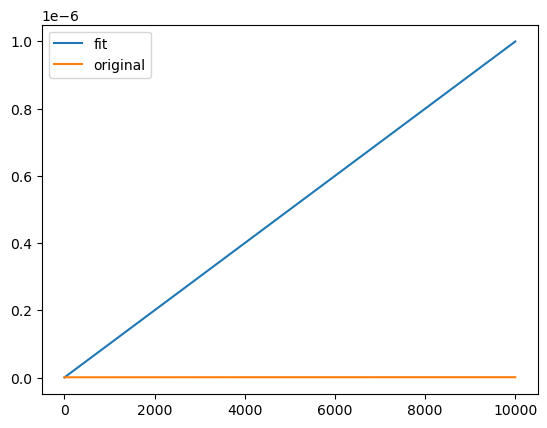

In [58]:
plt.plot(temps, fit_rates, label = "fit")
plt.plot(temps, rates, label = "original")
plt.legend()